# Linear and polynomial regression

In this notebook, we will briefly review the concepts behind linear and polynomial regression in 1-D. This is a very simplified example - but will show us the basic principles that we can then extend to higher dimensions - and understand why some things work and some may not.

This notebook is part of the class "Structural Geological Models".

(c) Florian Wellmann, CG3, 2023

## Brief review of the theory

Polynomial regression is a form of regression analysis where the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n^{th}$ degree polynomial. The polynomial regression model can be written as:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\beta_0, \beta_1, \beta_2, \ldots, \beta_n$ are the coefficients of the model,
- $n$ is the degree of the polynomial,
- $\epsilon$ is the error term.

The goal is to find the coefficients $\beta_i$ that minimize the sum of the squared residuals (the differences between observed and predicted values). This can be expressed as the following optimization problem:

$$
\min_{\beta_0, \beta_1, \ldots, \beta_n} \sum_{i=1}^{m} \left(y_i - (\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \cdots + \beta_n x_i^n)\right)^2
$$

where $m$ is the number of observations.

To solve this optimization problem, we set up a system of linear equations by taking partial derivatives of the above equation with respect to each coefficient and setting them to zero. This leads to a system of linear equations which can be solved using linear algebra techniques.

In matrix form, the polynomial regression model can be expressed as:

$$
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

where:
- $\mathbf{Y}$ is a vector of the dependent variable,
- $\mathbf{X}$ is a matrix with each column being a power of the independent variable,
- $\boldsymbol{\beta}$ is a vector of coefficients,
- $\boldsymbol{\epsilon}$ is a vector of the error terms.

The solution for the coefficient vector $\boldsymbol{\beta}$ in the least squares sense is given by:

$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

This equation provides the coefficients that minimize the sum of squared residuals and thus solve the polynomial regression problem.


In [2]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # needed to load the background image

## Input data

As a simple test case, we will use the image from the lecture with the well markers from the virtual drillholes. As a first task, we need to set up a coordinate system and determine the point positions.

For a (arguably, very simple) first implementation, we will use the image as a background in a matplotlib graph to determine the point positions:

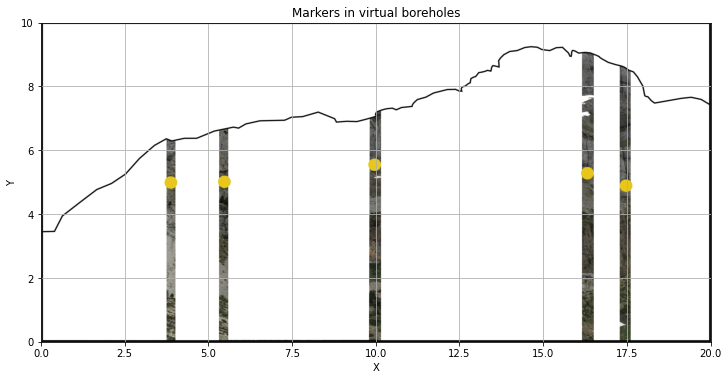

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your image using matplotlib's imread
image_path = 'WandC_boreholes_2.png'  # Replace with the path to your image file
img = mpimg.imread(image_path)

# Determine the aspect ratio of the image
image_aspect_ratio = img.shape[1] / img.shape[0]

# Create a figure with the aspect ratio of the image
fig, ax = plt.subplots(figsize=(12, 12 / image_aspect_ratio))

# Display the image with the same aspect ratio
ax.imshow(img, extent=[0, 20, 0, 10], aspect='auto')

# Set limits, labels, title, etc.
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Markers in virtual boreholes')

plt.grid()

# Show the plot
plt.show()


## Select input points

As a **first task**: determine the position of the input points and plot them above the image:

In [27]:
# x-positions of points:
x_positions = [4, 5.2, 10, 16.5, 17.5]

# y-positions of points:
y_positions = [5, 5, 5.8, 5.2, 4.9]

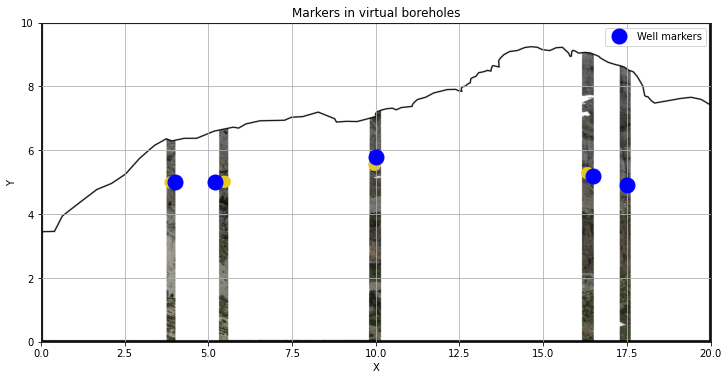

In [30]:
# Updated plot with point positions:


# Create a figure with the aspect ratio of the image
fig, ax = plt.subplots(figsize=(12, 12 / image_aspect_ratio))

# Display the image with the same aspect ratio
ax.imshow(img, extent=[0, 20, 0, 10], aspect='auto')

# Set limits, labels, title, etc.
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Markers in virtual boreholes')

plt.grid()

# Example data plot
ax.plot(x_positions, y_positions, 'o', markersize=15, color='blue', label='Well markers')
ax.legend();

Adjust the positions until you receive a good match to the markers.

## Polynomial regression

In a next step, we will perform a straight-forward polynomial regression to obtain an interface for the well markers. Note that, we place here a lot of confidence in the model itself - which we then fit to the data.

### Determining the coefficients $\beta$ of the polynomial 

In a first step, here the function to perform the polynomial regression:

In [32]:
def polynomial_regression(x_points, y_points, degree):
    """
    Performs polynomial regression on the given set of points.

    :param x_points: List of x-coordinates of the points.
    :param y_points: List of y-coordinates of the points.
    :param degree: Degree of the polynomial to fit.
    :return: Coefficients of the fitted polynomial.
    """
    # Fit the polynomial of the given degree
    coeffs = np.polyfit(x_points, y_points, degree)

    # Create a function from the coefficients
    poly_func = np.poly1d(coeffs)

    return coeffs

Note that this function returns the coefficients of the regression - depending on the selected degree. Let's start with this step:

In [48]:
# set the degree of the polynomial
degree = 4

coefficients = polynomial_regression(x_positions, y_positions, degree)

print(coefficients)

[ 2.71668208e-04 -1.37542241e-02  2.22355285e-01 -1.27517088e+00
  7.35372222e+00]


Before you continue **your task**: think (and discuss with your neighbors) what these coefficients mean.

### Plotting the results in the figure

We can now plot the polynomial for the determined coefficients back in the original plot:

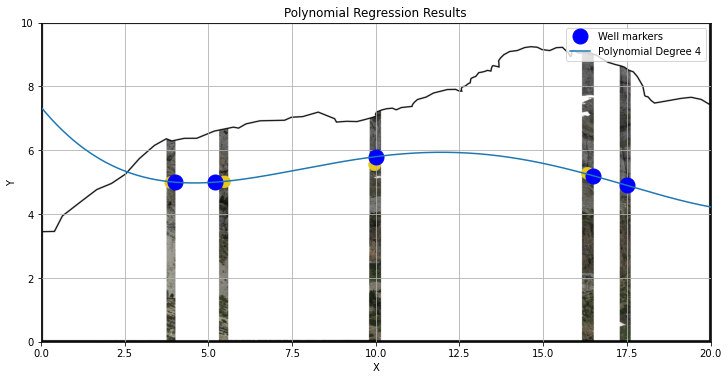

In [49]:
def plot_polynomial_regression(x_points, y_points, degree, coefficients):
    """
    Plots the results of the polynomial regression.

    :param x_points: List of x-coordinates of the points.
    :param y_points: List of y-coordinates of the points.
    :param degree: Degree of the polynomial that was fitted.
    :param coefficients: Coefficients of the fitted polynomial.
    """
    # Create a polynomial function from the coefficients
    poly_func = np.poly1d(coefficients)

    # Generate a dense range of x values for a smooth curve
    x_dense = np.linspace(0, 20, 500)

    # Create a figure with the aspect ratio of the image
    fig, ax = plt.subplots(figsize=(12, 12 / image_aspect_ratio))

    # Display the image with the same aspect ratio
    ax.imshow(img, extent=[0, 20, 0, 10], aspect='auto')

    # Set limits, labels, title, etc.
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Markers in virtual boreholes')

    plt.grid()

    # Example data plot
    ax.plot(x_points, y_points, 'o', markersize=15, color='blue', label='Well markers')

    # Plot the polynomial curve
    ax.plot(x_dense, poly_func(x_dense), label=f'Polynomial Degree {degree}')

    # Add labels, title, and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Polynomial Regression Results')
    ax.legend()

    # Show the plot
    plt.show()

plot_polynomial_regression(x_positions, y_positions, degree, coefficients)


## Experiment with data and interpolation

Test the following aspects to get a better insight into the results:
- Remove single points and evaluate how well the regression results fit the value at this position (ideally: calculate the vertical distance between predicted point and observation).
- Perform the tests for all degrees (up to 4) and calculate the squared sum of errors.